<h1 align='center'>Projet Réseaux Complexes NET4103</h1>
<div align='center'>Nouamane ARHACHOUI</div>

---




In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import collections

In [4]:
G_caltech = nx.read_graphml('/content/drive/MyDrive/Cours/complexnet/projet/fb100/Caltech36.graphml')

In [5]:
G_mit = nx.read_graphml('/content/drive/MyDrive/Cours/complexnet/projet/fb100/MIT8.graphml')

In [6]:
G_hopkins = nx.read_graphml('/content/drive/MyDrive/Cours/complexnet/projet/fb100/Johns Hopkins55.graphml')

Text(0.5, 1.0, 'Caltech Graph')

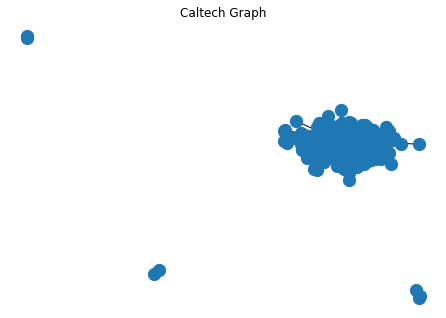

In [111]:
nx.draw(G_caltech, node_size=150)
plt.title('Caltech Graph')

Text(0.5, 1.0, 'MIT Graph')

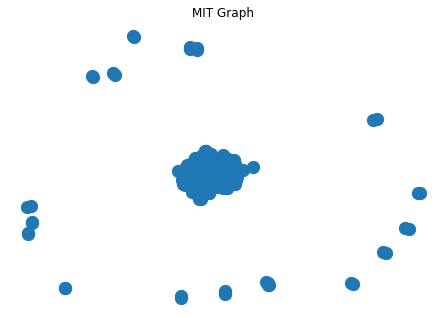

In [112]:
nx.draw(G_mit, node_size=150)
plt.title('MIT Graph')

Text(0.5, 1.0, 'Johns Hopkins')

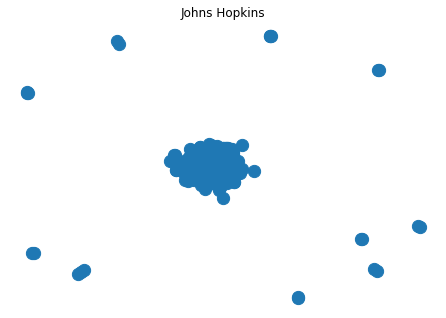

In [113]:
nx.draw(G_hopkins, node_size=150)
plt.title('Johns Hopkins')

In [14]:
def plot_degree_dist(G):
  degrees = [G.degree(n) for n in G.nodes()]
  plt.hist(degrees)
  plt.show()

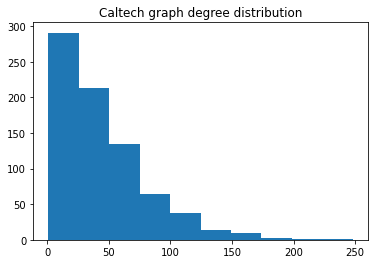

In [17]:
plt.title('Caltech graph degree distribution')
plot_degree_dist(G_caltech)

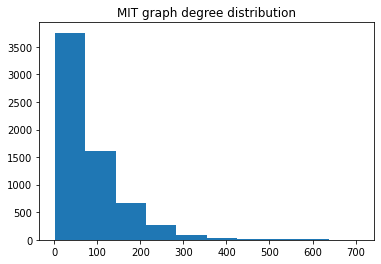

In [18]:
plt.title('MIT graph degree distribution')
plot_degree_dist(G_mit)

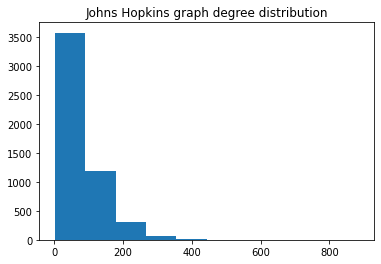

In [19]:
plt.title('Johns Hopkins graph degree distribution')
plot_degree_dist(G_hopkins)

In [65]:
gcc_caltech = nx.transitivity(G_caltech)
gcc_mit = nx.transitivity(G_mit)
gcc_hopkins = nx.transitivity(G_hopkins)

print('GCC Caltech =', gcc_caltech)
print('GCC MIT =', gcc_mit)
print('GCC Johns Hopkins =', gcc_hopkins)

GCC Caltech = 0.2912826901150874
GCC MIT = 0.18028845093502427
GCC Johns Hopkins = 0.19316123901594015


In [10]:
density_caltech = nx.density(G_caltech)
density_mit = nx.density(G_mit)
density_hopkins = nx.density(G_hopkins)

print('Density Caltech =', density_caltech)
print('Density MIT =', density_mit)
print('Density Johns Hopkins =', density_hopkins)

Density Caltech = 0.05640442132639792
Density MIT = 0.012118119495041378
Density Johns Hopkins = 0.013910200162372396


In [ ]:
gccs = [gcc_caltech, gcc_mit, gcc_hopkins]
densities = [density_caltech, density_mit, density_hopkins]

In [21]:
cc_caltech = list(nx.connected_components(G_caltech))
G_lcc_caltech = nx.subgraph(G_caltech, cc_caltech[0])
degree_caltech = dict(G_lcc_caltech.degree())
clustering_caltech = dict(nx.clustering(G_lcc_caltech))

cc_mit = list(nx.connected_components(G_mit))
G_lcc_mit = nx.subgraph(G_mit, cc_mit[0])
degree_mit = dict(G_lcc_mit.degree())
clustering_mit = dict(nx.clustering(G_lcc_mit))

cc_hopkins = list(nx.connected_components(G_hopkins))
G_lcc_hopkins = nx.subgraph(G_hopkins, cc_hopkins[0])
degree_hopkins = dict(G_lcc_hopkins.degree())
clustering_hopkins = dict(nx.clustering(G_lcc_hopkins))

In [31]:
np.mean(list(clustering_caltech.values()))

0.4091173048334612

In [32]:
nx.average_clustering(G_lcc_caltech)

0.4091173048334614

In [67]:
nx.transitivity(G_lcc_caltech)

0.2912809635141533

In [22]:
np.mean(list(clustering_mit.values()))

0.27235999658838644

In [23]:
nx.average_clustering(G_lcc_mit)

0.272359996588386

In [24]:
nx.transitivity(G_lcc_mit)

0.1802884023054581

In [25]:
np.mean(list(clustering_hopkins.values()))

0.26900836180589566

In [26]:
nx.average_clustering(G_lcc_hopkins)

0.2690083618058958

In [27]:
nx.transitivity(G_lcc_hopkins)

0.19316115952994883

### Caltech:
*   Mean local clustering coefficient = 0.409
*   Global clustering coefficient = 0.291
*   Density = 0.056

### MIT:
*   Mean local clustering coefficient = 0.272
*   Global clustering coefficient = 0.180
*   Density = 0.012

### Johns Hopkins:
*   Mean local clustering coefficient = 0.269
*   Global clustering coefficient = 0.193
*   Density = 0.014


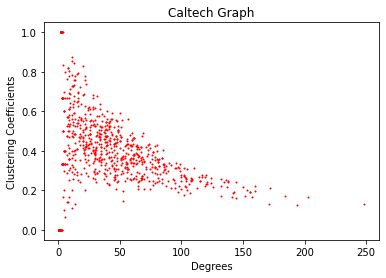

In [95]:
plt.scatter(list(degree_caltech.values()), list(clustering_caltech.values()), s= 1, color= 'red')
plt.title('Caltech Graph')
plt.xlabel('Degrees')
plt.ylabel('Clustering Coefficients')
plt.show()

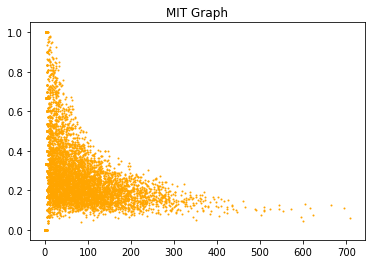

In [57]:
plt.scatter(list(degree_mit.values()), list(clustering_mit.values()), s= 1, color= 'orange')
plt.title('MIT Graph')
plt.show()

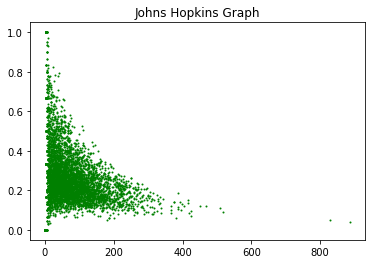

In [94]:
plt.scatter(list(degree_hopkins.values()), list(clustering_hopkins.values()), s= 1, color= 'green')
plt.title('Johns Hopkins Graph')
plt.show()

In [140]:
import glob
list_of_files = glob.glob("/content/drive/MyDrive/Cours/complexnet/projet/fb100/*")

l_size=[]
l_associativity=[]
for f in list_of_files:
  g = nx.read_graphml(f)
  
  l_size.append(g.size())
  l_associativity.append(nx.attribute_assortativity_coefficient(g, "student_fac"))

Mean Assortativity = 0.3227381585912151


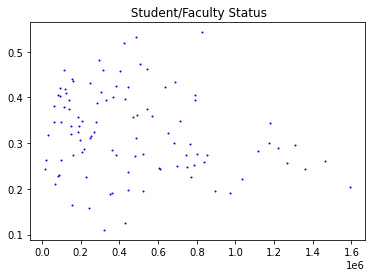

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


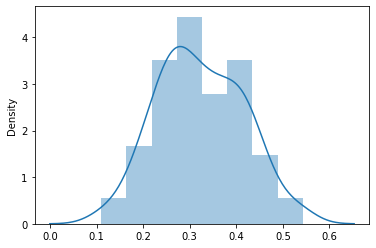

In [152]:
import seaborn
print("Mean Assortativity =",sum(l_associativity)/len(l_associativity))
plt.scatter(l_size,l_associativity,s=1,color=(0,0,1))
plt.title(' Student/Faculty Status')
plt.show()
seaborn.distplot(l_associativity)

In [ ]:
#l_associativity_major = []
#graphs = []
#for i in range(len(list_of_files)):
#  graphs.append(nx.read_graphml(list_of_files[i]))
#  l_associativity_major.append(nx.attribute_assortativity_coefficient(graphs[i], "major"))
#print("Mean Assortativity =",sum(l_associativity_major)/len(l_associativity_major))
#plt.scatter(l_size,l_associativity_major,s=1,color=(0,0,1))
#plt. title('Major')
#plt.show()
#seaborn.distplot(l_associativity_major)

/usr/local/lib/python3.6/dist-packages/networkx/algorithms/assortativity/correlation.py:263: RuntimeWarning: invalid value encountered in double_scalars
  r = (t - s) / (1 - s)
